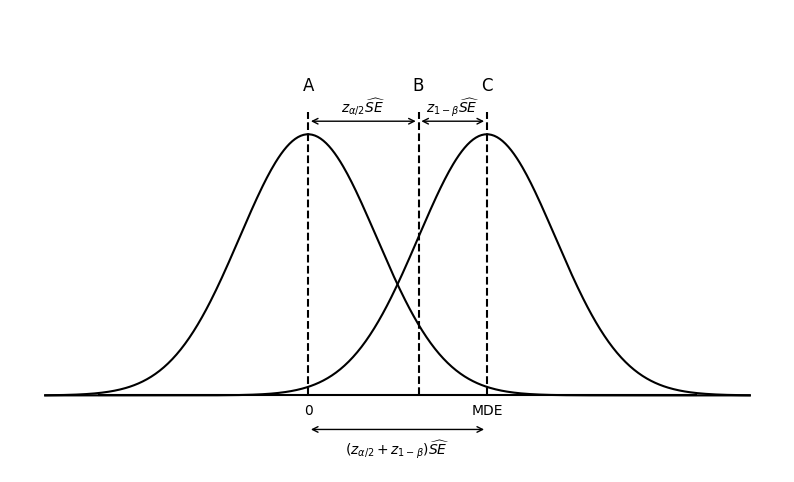

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis with wider x-limits for more space
fig, ax = plt.subplots(figsize=(10, 6))

# Create x values with extra room
x = np.linspace(-5, 8.4, 500)
null_mean = 0
crit_value = 2.1
alt_mean = 3.4
se = 1.3

# Null hypothesis distribution
null_pdf = (1/np.sqrt(2*np.pi*se**2)) * np.exp(-0.5*((x - null_mean)/se)**2)
ax.plot(x, null_pdf, color='black')

# Alternative hypothesis distribution
alt_pdf = (1/np.sqrt(2*np.pi*se**2)) * np.exp(-0.5*((x - alt_mean)/se)**2)
ax.plot(x, alt_pdf, color='black')

# Add real line at y=0, symmetric cutoff on left and right
real_line_xmin = -4
real_line_xmax = 7.4
ax.hlines(y=0, xmin=real_line_xmin, xmax=real_line_xmax, color='black')

# Compute top for vertical lines just below label height
label_height = max(null_pdf)*1.15
line_top = label_height - 0.02

# Draw shortened vertical dashed lines
ax.vlines([null_mean, crit_value, alt_mean], ymin=0, ymax=line_top, linestyle='dashed', color='black')

# Add "A", "B", "C" labels on top
ax.text(null_mean, label_height, 'A', ha='center', va='bottom', fontsize=12)
ax.text(crit_value, label_height, 'B', ha='center', va='bottom', fontsize=12)
ax.text(alt_mean, label_height, 'C', ha='center', va='bottom', fontsize=12)

# Add 0 and MDE labels at the bottom
ax.text(null_mean, -0.01, '0', ha='center', va='top')
ax.text(alt_mean, -0.01, 'MDE', ha='center', va='top')

# Add double-headed arrows to indicate distances
arrow_props = dict(arrowstyle='<->', color='black', linewidth=1)

# Upper arrows well above the peaks
top_arrow_height = max(null_pdf)*1.05
ax.annotate(
    '', xy=(null_mean, top_arrow_height), xytext=(crit_value, top_arrow_height),
    arrowprops=arrow_props
)
ax.text((null_mean + crit_value)/2, top_arrow_height + 0.01, r'$z_{\alpha/2}\widehat{SE}$', ha='center')

ax.annotate(
    '', xy=(crit_value, top_arrow_height), xytext=(alt_mean, top_arrow_height),
    arrowprops=arrow_props
)
ax.text((crit_value + alt_mean)/2, top_arrow_height + 0.01, r'$z_{1 - \beta}\widehat{SE}$', ha='center')

# Bottom arrow moved slightly down
bottom_arrow_height = -0.04
ax.annotate(
    '', xy=(null_mean, bottom_arrow_height), xytext=(alt_mean, bottom_arrow_height),
    arrowprops=arrow_props
)
# Move label down further so it is clearly not on x-axis
ax.text((null_mean + alt_mean)/2, bottom_arrow_height - 0.03, r'$(z_{\alpha/2} + z_{1 - \beta})\widehat{SE}$', ha='center')

# Clean up axes
ax.spines.clear()
ax.set_ylim(bottom_arrow_height - 0.05, label_height + 0.1)
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_title('')

fig.savefig('./bloom-curve.png', dpi=300, bbox_inches='tight')

plt.show();
